# Descomposición en Modos Dinámicos (DMD) para la Sustracción de Fondo en Videos

En este proyecto aplicamos la **Descomposición en Modos Dinámicos (DMD)** al problema de **sustracción de fondo en secuencias de video**. El objetivo de esta implementación es lograr separar el **fondo estático** de los **objetos en movimiento** (como vehículos o personas).

DMD nos permite descomponer un video en modos espacio-temporales que evolucionan de forma coherente en el tiempo. Estos modos se extraen a partir de una secuencia de fotogramas, tratando cada uno como una "captura" de alta dimensión del sistema. La técnica identifica modos dominantes de baja frecuencia (que representan el fondo) y aísla los modos transitorios de alta frecuencia (asociados al movimiento o ruido).

---

## Procedimiento

1. **Preprocesamiento del Video:**
   - Se carga el video y cada fotograma se convierte a escala de grises y se aplana en un vector columna.
   - El resultado es una matriz \( X \) de dimensiones `(pixeles × tiempo)`.

2. **Descomposición DMD:**
   - Implementamos DMD desde cero, sin usar librerías externas.
   - La descomposición nos da:
     - **Modos DMD (Φ):** estructuras espaciales.
     - **Valores propios (ω):** dinámica temporal.
     - **Amplitudes (b):** contribución inicial de cada modo.

3. **Separación Fondo/Figura:**
   - Se reconstruye el video usando solo los modos dominantes, obteniendo una **aproximación de bajo rango del fondo**.
   - Al restar este fondo del video original, obtenemos el **primer plano escaso**, donde se resaltan los movimientos.

4. **Visualización y Exportación:**
   - Se visualiza el fotograma original, el fondo reconstruido y el primer plano (figura) en paralelo.
   - Opcionalmente, se pueden guardar los videos separados de fondo y figura.

---

## ¿Por qué usar DMD?

A diferencia de métodos clásicos de sustracción de fondo (como diferencia de fotogramas o modelos de mezcla gaussiana), DMD:

- **No requiere entrenamiento supervisado ni etiquetas.**
- **Maneja naturalmente cambios de iluminación** separando diferentes escalas temporales.
- **Ofrece modos espacio-temporales interpretables**, útiles para análisis más profundos (como dinámica del tráfico o patrones de comportamiento).

In [ ]:
import pre

# Ejemplo 1 (Tráfico vehicular)

Usamos un fragmento de 3 segundos de cámara de seguridad que captura el movimiento vehicular sobre una carretera.

Loaded video with 76 frames of size (480, 854)


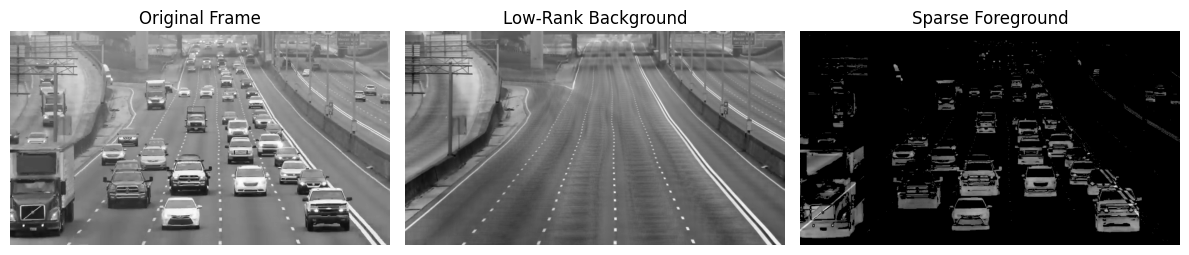

✅ Video saved as 'background_tr.avi'
✅ Video saved as 'foreground_tr.avi'


In [38]:
# Procesamiento del video
video_path = "traffic.mp4"  # <- Replace with your video path
X, frame_shape = pre.vid_proc(video_path)
print(f"Loaded video with {X.shape[1]} frames of size {frame_shape}")

# Descomposicion DMD
Phi, omega, b, X_dmd = pre.dmd(X, 10)

# Background and foreground

X_background, X_foreground = pre.background(X, X_dmd, threshold=50)

# Visualizacion

frame_index = 70  # Choose a frame to visualize
pre.visualize_frame(X, X_background, X_foreground, frame_shape, frame_index)

# Guardar videos

pre.save_video(X_background, frame_shape, "background_tr.avi", fps=24)
pre.save_video(X_foreground, frame_shape, "foreground_tr.avi", fps=24)

Loaded video with 148 frames of size (480, 854)


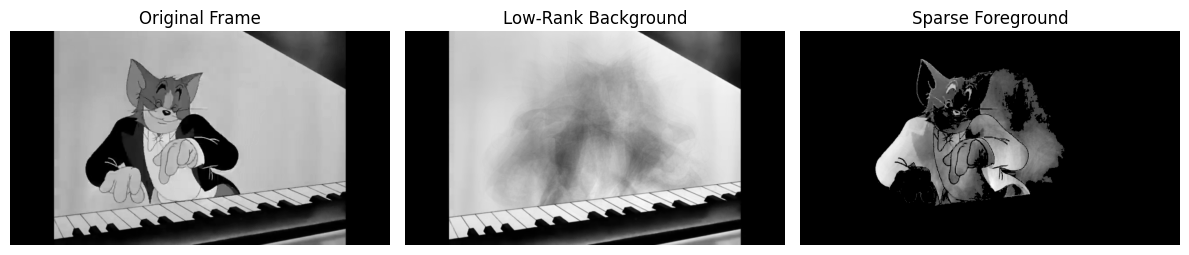

✅ Video saved as 'background_tom.avi'
✅ Video saved as 'foreground_tom.avi'


In [39]:
# Procesamiento del video
video_path = "tom.mp4"  # <- Replace with your video path
X, frame_shape = pre.vid_proc(video_path)
print(f"Loaded video with {X.shape[1]} frames of size {frame_shape}")

# Descomposicion DMD
Phi, omega, b, X_dmd = pre.dmd(X, 1)

# Background and foreground

X_background, X_foreground = pre.background(X, X_dmd, threshold=50)

# Visualizacion

frame_index = 70  # Choose a frame to visualize
pre.visualize_frame(X, X_background, X_foreground, frame_shape, frame_index)

# Guardar videos

pre.save_video(X_background, frame_shape, "background_tom.avi", fps=24)
pre.save_video(X_foreground, frame_shape, "foreground_tom.avi", fps=24)
